# **Initializing Data Exploration: Library Import and DataFrame Loading**

#### The dataset includes information on causes of death and the corresponding mortality rate per 100,000 inhabitants from 2018 to 2022. Tables were tailored based on the features provided on the Statistics Canada website. You can access the customized table here:

[Deaths and mortality rate (age standardization using 2011 population), by selected grouped causes](https://www150.statcan.gc.ca/t1/tbl1/en/cv!recreate.action?pid=1310080001&selectedNodeIds=1D2,1D11,4D1,4D2&checkedLevels=0D1,1D2,2D2&refPeriods=20180101,20220101&dimensionLayouts=layout3,layout3,layout3,layout3,layout2&vectorDisplay=false)

#### To keep things simple and considering the time available for the analysis project, We focused on the province of British Columbia (BC).

#### For comparison purposes, we decided to include data for the entire country, Canada, as well as a province with lower population density than BC; in this case, we chose Newfoundland and Labrador.

In [ ]:
# Importing
import sklearn
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm
import statistics
import numpy as np


# Loading the data set
causes_of_death = pd.read_csv('https://raw.githubusercontent.com/priscilalourinho/data-analytics-brainstation/main/datasets/deaths-mortality/01.%20Deaths%20and%20Mortality%20Rate%202018%20-%202022_DATACLEAN_2.csv',  encoding="UTF-8",sep=",",
                    thousands = ",", decimal=".")

In [ ]:
causes_of_death.head(10)

,LOCATION,GENDER,DEATH_CAUSE,CHARACTERISTICS,2018,2019,2020,2021,2022
0,"Canada, place of residence",Both sexes,Salmonella infections [A01-A02],nr_deaths,7,6,9.0,11.0,12.0
1,"Canada, place of residence",Both sexes,Salmonella infections [A01-A02],mort_rate_100K,0,0,0.0,0.0,0.0
2,"Canada, place of residence",Both sexes,"Shigellosis and amoebiasis [A03, A06]",nr_deaths,1,0,0.0,1.0,0.0
3,"Canada, place of residence",Both sexes,"Shigellosis and amoebiasis [A03, A06]",mort_rate_100K,0,0,0.0,0.0,0.0
4,"Canada, place of residence",Both sexes,"Certain other intestinal infections [A04, A07...",nr_deaths,880,806,782.0,658.0,772.0
5,"Canada, place of residence",Both sexes,"Certain other intestinal infections [A04, A07...",mort_rate_100K,2,1.8,1.7,1.4,1.6
6,"Canada, place of residence",Both sexes,Tuberculosis [A16-A19],nr_deaths,84,71,99.0,110.0,119.0
7,"Canada, place of residence",Both sexes,Tuberculosis [A16-A19],mort_rate_100K,0.2,0.2,0.2,0.2,0.3
8,"Canada, place of residence",Both sexes,Whooping cough [A37],nr_deaths,1,2,0.0,0.0,0.0
9,"Canada, place of residence",Both sexes,Whooping cough [A37],mort_rate_100K,0,0,0.0,0.0,0.0


In [ ]:
causes_of_death.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   LOCATION         330 non-null    object 
 1   GENDER           330 non-null    object 
 2   DEATH_CAUSE      330 non-null    object 
 3   CHARACTERISTICS  330 non-null    object 
 4   2018             330 non-null    object 
 5   2019             330 non-null    object 
 6   2020             330 non-null    float64
 7   2021             330 non-null    float64
 8   2022             330 non-null    float64
dtypes: float64(3), object(6)
memory usage: 23.3+ KB


In [ ]:
locations = causes_of_death['LOCATION'].unique()
print(locations)

['Canada, place of residence'
 'Newfoundland and Labrador, place of residence'
 'British Columbia, place of residence']


# **Data cleaning**

### To make it easier to read the dataset and generate reports in the future, we'll clean the data. In the next steps, we'll remove any extra unnecessary information and convert numerical data for statistical analysis.

In [ ]:
# removing ', place of residence' of the end of each location name
causes_of_death['LOCATION'] = causes_of_death['LOCATION'].str.replace(', place of residence', '')

# replacing ['Canada' 'Newfoundland and Labrador' 'British Columbia'] for its acronyms
replacement_dict = {'Canada': 'CA', 'Newfoundland and Labrador': 'NL', 'British Columbia': 'BC'}
causes_of_death['LOCATION'] = causes_of_death['LOCATION'].replace(replacement_dict)

# removing the death causes codes (eg. [A16-A19]) from the DEATH_CAUSES registers
causes_of_death['DEATH_CAUSE'] = causes_of_death['DEATH_CAUSE'].str.replace(r'\[.*?\]', '', regex=True)

# Removing column GENDER
causes_of_death = causes_of_death.drop('GENDER', axis=1)

In [ ]:
# The columns containing the values for statistical analysis currently have a data type of object.
# To facilitate statistical computations, it is necessary to convert them to the float data type.
causes_of_death["2018"] = pd.to_numeric(causes_of_death["2018"].astype(str).str.replace(',', ''), errors='coerce')
causes_of_death["2019"] = pd.to_numeric(causes_of_death["2019"].astype(str).str.replace(',', ''), errors='coerce')
causes_of_death["2020"] = pd.to_numeric(causes_of_death["2020"].astype(str).str.replace(',', ''), errors='coerce')
causes_of_death["2021"] = pd.to_numeric(causes_of_death["2021"].astype(str).str.replace(',', ''), errors='coerce')
causes_of_death["2022"] = pd.to_numeric(causes_of_death["2022"].astype(str).str.replace(',', ''), errors='coerce')

In [ ]:
causes_of_death.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   LOCATION         330 non-null    object 
 1   DEATH_CAUSE      330 non-null    object 
 2   CHARACTERISTICS  330 non-null    object 
 3   2018             324 non-null    float64
 4   2019             324 non-null    float64
 5   2020             330 non-null    float64
 6   2021             330 non-null    float64
 7   2022             330 non-null    float64
dtypes: float64(5), object(3)
memory usage: 20.8+ KB


In [ ]:
causes_of_death.head(10)

,LOCATION,DEATH_CAUSE,CHARACTERISTICS,2018,2019,2020,2021,2022
0,CA,Salmonella infections,nr_deaths,7.0,6.0,9.0,11.0,12.0
1,CA,Salmonella infections,mort_rate_100K,0.0,0.0,0.0,0.0,0.0
2,CA,Shigellosis and amoebiasis,nr_deaths,1.0,0.0,0.0,1.0,0.0
3,CA,Shigellosis and amoebiasis,mort_rate_100K,0.0,0.0,0.0,0.0,0.0
4,CA,Certain other intestinal infections,nr_deaths,880.0,806.0,782.0,658.0,772.0
5,CA,Certain other intestinal infections,mort_rate_100K,2.0,1.8,1.7,1.4,1.6
6,CA,Tuberculosis,nr_deaths,84.0,71.0,99.0,110.0,119.0
7,CA,Tuberculosis,mort_rate_100K,0.2,0.2,0.2,0.2,0.3
8,CA,Whooping cough,nr_deaths,1.0,2.0,0.0,0.0,0.0
9,CA,Whooping cough,mort_rate_100K,0.0,0.0,0.0,0.0,0.0


In [ ]:
# We should divide the dataset into two separate data frames: one for the number of deaths (nr_deaths) and another for the mortality rate (mort_rate_100k).

df_mortality = causes_of_death[causes_of_death['CHARACTERISTICS'] != 'nr_deaths']
df_mortality.head()

,LOCATION,DEATH_CAUSE,CHARACTERISTICS,2018,2019,2020,2021,2022
1,CA,Salmonella infections,mort_rate_100K,0.0,0.0,0.0,0.0,0.0
3,CA,Shigellosis and amoebiasis,mort_rate_100K,0.0,0.0,0.0,0.0,0.0
5,CA,Certain other intestinal infections,mort_rate_100K,2.0,1.8,1.7,1.4,1.6
7,CA,Tuberculosis,mort_rate_100K,0.2,0.2,0.2,0.2,0.3
9,CA,Whooping cough,mort_rate_100K,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Verifying that we are still taking into account all three locations
locations_2 = df_mortality['LOCATION'].unique()
print(locations_2)

['CA' 'NL' 'BC']


In [ ]:

locations = causes_of_death['LOCATION'].unique()
print(locations)

['CA' 'NL' 'BC']


In [ ]:
# Additionally, we must exclude the CHARACTERISTICS = mort_rate_100K from the original dataframe.
causes_of_death = causes_of_death[causes_of_death['CHARACTERISTICS'] != 'mort_rate_100K']
causes_of_death.head()

,LOCATION,DEATH_CAUSE,CHARACTERISTICS,2018,2019,2020,2021,2022
0,CA,Salmonella infections,nr_deaths,7.0,6.0,9.0,11.0,12.0
2,CA,Shigellosis and amoebiasis,nr_deaths,1.0,0.0,0.0,1.0,0.0
4,CA,Certain other intestinal infections,nr_deaths,880.0,806.0,782.0,658.0,772.0
6,CA,Tuberculosis,nr_deaths,84.0,71.0,99.0,110.0,119.0
8,CA,Whooping cough,nr_deaths,1.0,2.0,0.0,0.0,0.0


# **Exploring Patterns in Causes of Death through Fundamental Statistical Analysis**

 The three blocks of code below follows a consistent pattern, generating statistics like **mean, median, standard deviation, minimum, and maximum** for Canada (CA), British Columbia (BC), and Newfoundland and Labrador (NL).

All of them include the same types of plots: **normal curve, box plot, scatter plot, histograms, bar plots, and Pareto charts.**

The goal is to **use visual representations to better understand how causes of death behave based on the sample data we have**.


## **Quick guide to understand the plots:**

####→ **Normal Curve:**
It's a curve that shows how data is spread out. **Most data points are in the middle, and fewer are on the sides.**

####→ **Box Plot:**
It's a box-shaped that provides a visual summary of the distribution of a dataset. ***It shows the median, quartiles, and potential outliers.***

####→ **Histogram:**
A histogram is a bar chart that displays the distribution of a continuous dataset. It divides the data into intervals (bins) and represents the frequency of values within each bin. ***It provides insights into the shape and central tendencies of the data.***

####→ **Pareto Chart:**
A Pareto chart combines both bar and line graphs. It arranges categories in descending order by frequency or impact. The left vertical axis represents the frequency or count, while the right vertical axis represents the cumulative percentage. ***It helps identify the most significant factors in a dataset.***

## **Plots - Canada (CA), British Columbia (BC) and Newfoundland and Labrador (NL):**

##### CA - Canada

In [ ]:
# Calculate mean, median, std, and sum for the 'CA' location
ca_location_stats = pd.DataFrame({
    '2018': [causes_of_death.loc[causes_of_death['LOCATION'] == 'CA', '2018'].mean().round(2), causes_of_death.loc[causes_of_death['LOCATION'] == 'CA', '2018'].median().round(2), causes_of_death.loc[causes_of_death['LOCATION'] == 'CA', '2018'].std().round(2), causes_of_death.loc[causes_of_death['LOCATION'] == 'CA', '2018'].min().round(2),causes_of_death.loc[causes_of_death['LOCATION'] == 'CA', '2018'].max().round(2)],
    '2019': [causes_of_death.loc[causes_of_death['LOCATION'] == 'CA', '2019'].mean().round(2), causes_of_death.loc[causes_of_death['LOCATION'] == 'CA', '2019'].median().round(2), causes_of_death.loc[causes_of_death['LOCATION'] == 'CA', '2019'].std().round(2), causes_of_death.loc[causes_of_death['LOCATION'] == 'CA', '2019'].min().round(2),causes_of_death.loc[causes_of_death['LOCATION'] == 'CA', '2019'].max().round(2)],
    '2020': [causes_of_death.loc[causes_of_death['LOCATION'] == 'CA', '2020'].mean().round(2), causes_of_death.loc[causes_of_death['LOCATION'] == 'CA', '2020'].median().round(2), causes_of_death.loc[causes_of_death['LOCATION'] == 'CA', '2020'].std().round(2), causes_of_death.loc[causes_of_death['LOCATION'] == 'CA', '2020'].min().round(2),causes_of_death.loc[causes_of_death['LOCATION'] == 'CA', '2020'].max().round(2)],
    '2021': [causes_of_death.loc[causes_of_death['LOCATION'] == 'CA', '2021'].mean().round(2), causes_of_death.loc[causes_of_death['LOCATION'] == 'CA', '2021'].median().round(2), causes_of_death.loc[causes_of_death['LOCATION'] == 'CA', '2021'].std().round(2), causes_of_death.loc[causes_of_death['LOCATION'] == 'CA', '2021'].min().round(2),causes_of_death.loc[causes_of_death['LOCATION'] == 'CA', '2021'].max().round(2)],
    '2022': [causes_of_death.loc[causes_of_death['LOCATION'] == 'CA', '2022'].mean().round(2), causes_of_death.loc[causes_of_death['LOCATION'] == 'CA', '2022'].median().round(2), causes_of_death.loc[causes_of_death['LOCATION'] == 'CA', '2022'].std().round(2), causes_of_death.loc[causes_of_death['LOCATION'] == 'CA', '2022'].min().round(2),causes_of_death.loc[causes_of_death['LOCATION'] == 'CA', '2022'].max().round(2)]
}, index=['Mean', 'Median', 'Std','Min','Max'])


print(ca_location_stats)


            2018      2019      2020      2021      2022
Mean     5290.81   5283.35   5607.49   5666.07   6074.09
Median    390.00    423.50    429.00    431.00    405.00
Std     14921.33  14966.69  15123.58  15356.62  15762.75
Min         0.00      0.00      0.00      0.00      0.00
Max     79726.00  80372.00  81242.00  82822.00  82412.00


In [ ]:
ca_location_stats.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, Mean to Max
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2018    5 non-null      float64
 1   2019    5 non-null      float64
 2   2020    5 non-null      float64
 3   2021    5 non-null      float64
 4   2022    5 non-null      float64
dtypes: float64(5)
memory usage: 240.0+ bytes


In [ ]:
ca_location_stats

,2018,2019,2020,2021,2022
Mean,5290.81,5283.35,5607.49,5666.07,6074.09
Median,390.00,423.50,429.00,431.00,405.00
Std,14921.33,14966.69,15123.58,15356.62,15762.75
Min,0.00,0.00,0.00,0.00,0.00
Max,79726.00,80372.00,81242.00,82822.00,82412.00


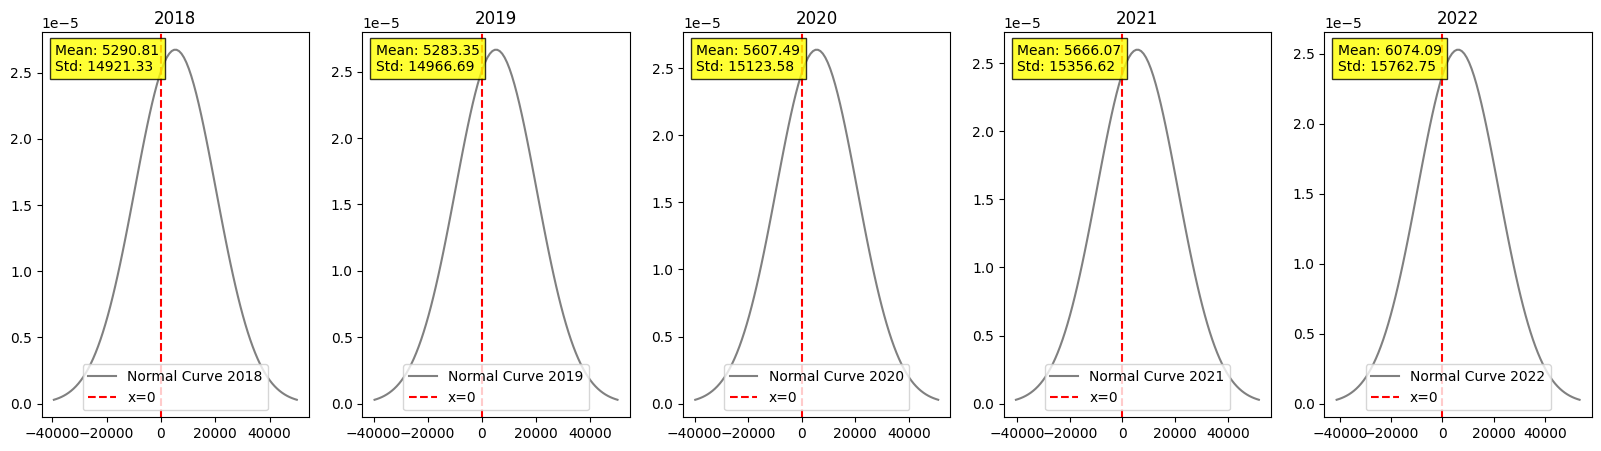

In [ ]:
# Create subplots
fig, axs = plt.subplots(1, 5, figsize=(20 , 5))

axs = axs.flatten()

# Plot normal curves for each column
for i, column in enumerate(ca_location_stats.columns):
    ax = axs[i]
    mean = ca_location_stats.loc['Mean', column]
    std = ca_location_stats.loc['Std', column]

    # Generate data points for the normal curve
    x = np.linspace(mean - 3 * std, mean + 3 * std, 100)
    y = norm.pdf(x, mean, std)

    # Plot the normal curve
    ax.plot(x, y, label=f'Normal Curve {column}',color='grey')
    ax.axvline(x=0, color='r', linestyle='--', label='x=0')

    # Add a title to each subplot
    ax.set_title(column)
    ax.legend()

    # Add legend with mean and std information
    ax.legend()

    # Add text with mean and std information
    ax.text(0.05, 0.9, f'Mean: {mean:.2f}\nStd: {std:.2f}', transform=ax.transAxes, bbox=dict(facecolor='yellow', alpha=0.8))

#plt.tight_layout()
plt.show()


In [ ]:
# Separated data frame causes_of_death
causes_of_death_ca = causes_of_death[causes_of_death['LOCATION'] == 'CA']
causes_of_death_ca.head()

,LOCATION,DEATH_CAUSE,CHARACTERISTICS,2018,2019,2020,2021,2022
0,CA,Salmonella infections,nr_deaths,7.0,6.0,9.0,11.0,12.0
2,CA,Shigellosis and amoebiasis,nr_deaths,1.0,0.0,0.0,1.0,0.0
4,CA,Certain other intestinal infections,nr_deaths,880.0,806.0,782.0,658.0,772.0
6,CA,Tuberculosis,nr_deaths,84.0,71.0,99.0,110.0,119.0
8,CA,Whooping cough,nr_deaths,1.0,2.0,0.0,0.0,0.0


In [ ]:
# Separated data frame mortality rate Canada
df_mortality_ca = df_mortality[df_mortality['LOCATION'] == 'CA']
df_mortality_ca.head()

,LOCATION,DEATH_CAUSE,CHARACTERISTICS,2018,2019,2020,2021,2022
1,CA,Salmonella infections,mort_rate_100K,0.0,0.0,0.0,0.0,0.0
3,CA,Shigellosis and amoebiasis,mort_rate_100K,0.0,0.0,0.0,0.0,0.0
5,CA,Certain other intestinal infections,mort_rate_100K,2.0,1.8,1.7,1.4,1.6
7,CA,Tuberculosis,mort_rate_100K,0.2,0.2,0.2,0.2,0.3
9,CA,Whooping cough,mort_rate_100K,0.0,0.0,0.0,0.0,0.0


In [ ]:
causes_of_death_ca_count = causes_of_death_ca['DEATH_CAUSE'].count()
causes_of_death_ca_count

55

<ipython-input-20-8df8eb032bb7>:23: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


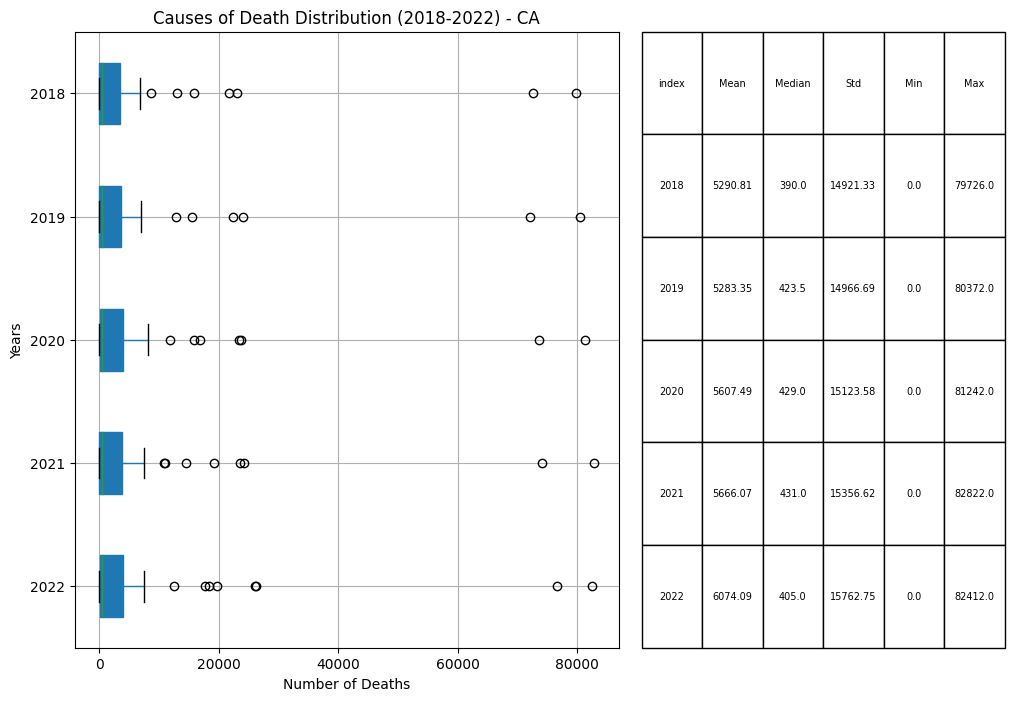

In [ ]:
# Extracting the years from the DataFrame columns
years = ['2022', '2021', '2020', '2019', '2018']

# Creating a figure with subplots
fig, (ax_box, ax_table) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [15, 10], 'wspace': 0.05}, figsize=(12, 8))

# Box plot
causes_of_death_ca.boxplot(column=years, vert=False, patch_artist=True, ax=ax_box)

# Adding labels and title to the box plot
ax_box.set_xlabel('Number of Deaths')
ax_box.set_ylabel('Years')
ax_box.set_title('Causes of Death Distribution (2018-2022) - CA')

# Table plot with an enlarged bbox
table_data = ca_location_stats.T.reset_index()
table = ax_table.table(cellText=table_data.values, colLabels=table_data.columns, loc='center', cellLoc='center', bbox=[0, 0, 1, 1], fontsize=20)

# Hide axes
ax_table.axis('off')

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()


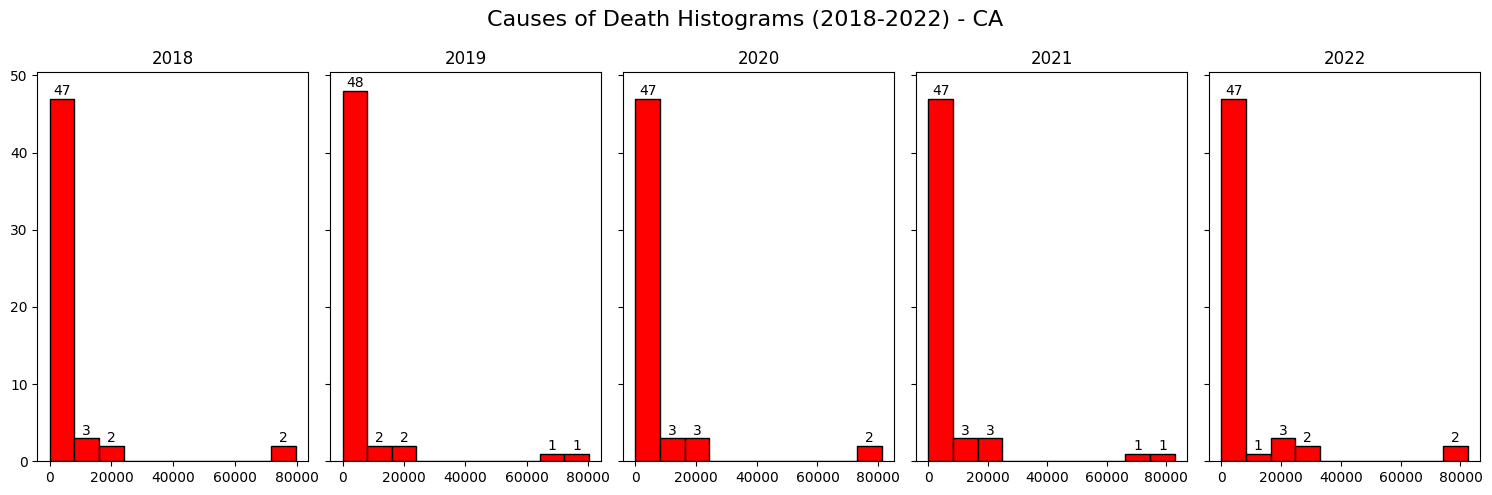

In [ ]:
# Extract only the columns '2018', '2019', '2020', '2021', and '2022'
selected_columns_ca = causes_of_death_ca[['2018', '2019', '2020', '2021', '2022']]

# Create subplots
fig, axs = plt.subplots(1, 5, figsize=(15, 5), sharey=True, tight_layout=True)

# Plot histograms for each year and add titles
for i, column in enumerate(selected_columns_ca.columns):
    counts, bins, patches = axs[i].hist(selected_columns_ca[column], bins=10, color='red', edgecolor='black')
    axs[i].set_title(column)

    # Add data labels on top of each bar
    for count, bin_value, patch in zip(counts, bins, patches):
        if count > 0:
            axs[i].text(patch.get_x() + patch.get_width() / 2, patch.get_height() + 0.05,
                        f'{int(count)}', ha='center', va='bottom')


# Add overall title
plt.suptitle('Causes of Death Histograms (2018-2022) - CA', fontsize=16)

# Show the plots
plt.show()


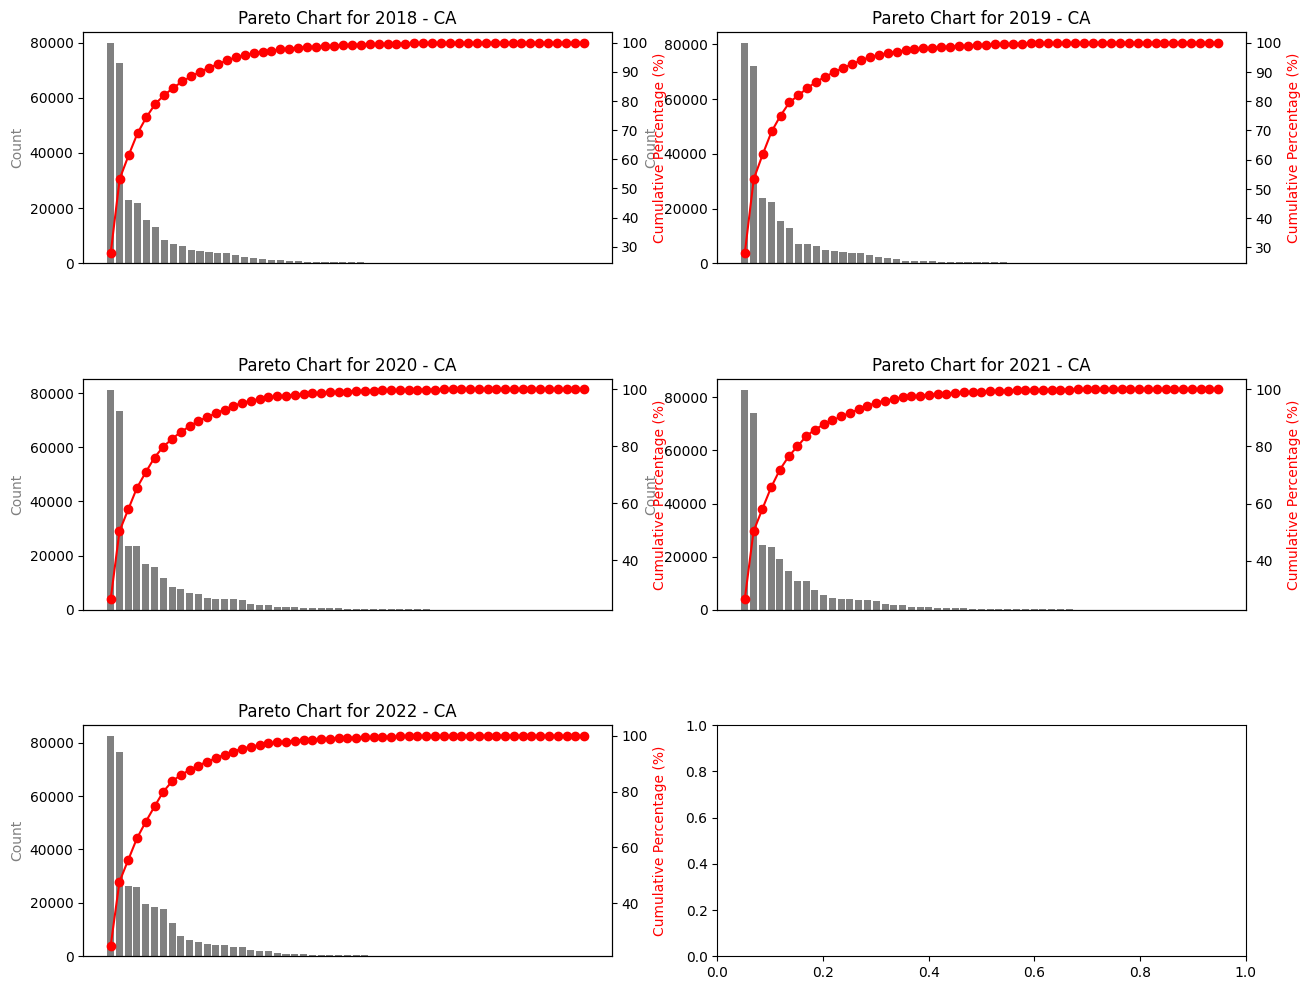

In [ ]:
# Set 'DEATH_CAUSE' as the index
causes_of_death_ca.set_index('DEATH_CAUSE', inplace=True)

# Create subplots with 2 columns and 3 rows
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 12))
fig.subplots_adjust(hspace=0.5)  # Adjust vertical space between subplots

# Iterate through each year and subplot
for i, year in enumerate(['2018', '2019', '2020', '2021', '2022']):
    # Sort the data in descending order
    sorted_data_ca = causes_of_death_ca.sort_values(by=year, ascending=False)

    # Calculate cumulative percentage
    cumulative_percentage = sorted_data_ca[year].cumsum() / sorted_data_ca[year].sum() * 100

    # Get the current subplot
    ax1 = axes[i // 2, i % 2]

    # Plot the bar chart
    ax1.bar(sorted_data_ca.index, sorted_data_ca[year], color='grey')

    # Create the line plot for cumulative percentage
    ax2 = ax1.twinx()
    ax2.plot(sorted_data_ca.index, cumulative_percentage, color='red', marker='o')

    # Remove x-axis labels
    ax1.set_xticks([])
    ax1.set_xticklabels([])

    # Remove y-axis labels
    #ax1.set_yticks([])
    #ax1.set_yticklabels([])

    # Set labels and title
    ax1.set_ylabel('Count', color='grey')
    ax2.set_ylabel('Cumulative Percentage (%)', color='red')
    ax1.set_title(f'Pareto Chart for {year} - CA')


# Show the plot
plt.show()

In [ ]:
sorted_data_ca.head()

,LOCATION,CHARACTERISTICS,2018,2019,2020,2021,2022
DEATH_CAUSE,,,,,,,
Malignant neoplasms,CA,nr_deaths,79726.0,80372.0,81242.0,82822.0,82412.0
Major cardiovascular diseases,CA,nr_deaths,72507.0,72035.0,73521.0,74018.0,76639.0
All other diseases (residual) 26,CA,nr_deaths,21710.0,22348.0,23445.0,24225.0,26205.0
Dementia,CA,nr_deaths,23047.0,23978.0,23636.0,23616.0,25994.0
COVID-19,CA,nr_deaths,NaN,NaN,15890.0,14466.0,19716.0


##### BC - British Columbia

In [ ]:

bc_location_stats = pd.DataFrame({
    '2018': [causes_of_death.loc[causes_of_death['LOCATION'] == 'BC', '2018'].mean().round(2), causes_of_death.loc[causes_of_death['LOCATION'] == 'BC', '2018'].median().round(2), causes_of_death.loc[causes_of_death['LOCATION'] == 'BC', '2018'].std().round(2), causes_of_death.loc[causes_of_death['LOCATION'] == 'BC', '2018'].min().round(2),causes_of_death.loc[causes_of_death['LOCATION'] == 'BC', '2018'].max().round(2)],
    '2019': [causes_of_death.loc[causes_of_death['LOCATION'] == 'BC', '2019'].mean().round(2), causes_of_death.loc[causes_of_death['LOCATION'] == 'BC', '2019'].median().round(2), causes_of_death.loc[causes_of_death['LOCATION'] == 'BC', '2019'].std().round(2), causes_of_death.loc[causes_of_death['LOCATION'] == 'BC', '2019'].min().round(2),causes_of_death.loc[causes_of_death['LOCATION'] == 'BC', '2019'].max().round(2)],
    '2020': [causes_of_death.loc[causes_of_death['LOCATION'] == 'BC', '2020'].mean().round(2), causes_of_death.loc[causes_of_death['LOCATION'] == 'BC', '2020'].median().round(2), causes_of_death.loc[causes_of_death['LOCATION'] == 'BC', '2020'].std().round(2), causes_of_death.loc[causes_of_death['LOCATION'] == 'BC', '2020'].min().round(2),causes_of_death.loc[causes_of_death['LOCATION'] == 'BC', '2020'].max().round(2)],
    '2021': [causes_of_death.loc[causes_of_death['LOCATION'] == 'BC', '2021'].mean().round(2), causes_of_death.loc[causes_of_death['LOCATION'] == 'BC', '2021'].median().round(2), causes_of_death.loc[causes_of_death['LOCATION'] == 'BC', '2021'].std().round(2), causes_of_death.loc[causes_of_death['LOCATION'] == 'BC', '2021'].min().round(2),causes_of_death.loc[causes_of_death['LOCATION'] == 'BC', '2021'].max().round(2)],
    '2022': [causes_of_death.loc[causes_of_death['LOCATION'] == 'BC', '2022'].mean().round(2), causes_of_death.loc[causes_of_death['LOCATION'] == 'BC', '2022'].median().round(2), causes_of_death.loc[causes_of_death['LOCATION'] == 'BC', '2022'].std().round(2), causes_of_death.loc[causes_of_death['LOCATION'] == 'BC', '2022'].min().round(2),causes_of_death.loc[causes_of_death['LOCATION'] == 'BC', '2022'].max().round(2)]
}, index=['Mean', 'Median', 'Std', 'Min','Max'])


print(bc_location_stats)

            2018      2019      2020      2021      2022
Mean      712.46    714.09    751.49    810.67    832.95
Median     41.00     44.50     42.00     53.00     45.00
Std      2020.48   2024.12   2070.54   2139.93   2181.21
Min         0.00      0.00      0.00      0.00      0.00
Max     10390.00  10656.00  10746.00  11051.00  11032.00


In [ ]:
bc_location_stats.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, Mean to Max
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2018    5 non-null      float64
 1   2019    5 non-null      float64
 2   2020    5 non-null      float64
 3   2021    5 non-null      float64
 4   2022    5 non-null      float64
dtypes: float64(5)
memory usage: 240.0+ bytes


In [ ]:
bc_location_stats

,2018,2019,2020,2021,2022
Mean,712.46,714.09,751.49,810.67,832.95
Median,41.00,44.50,42.00,53.00,45.00
Std,2020.48,2024.12,2070.54,2139.93,2181.21
Min,0.00,0.00,0.00,0.00,0.00
Max,10390.00,10656.00,10746.00,11051.00,11032.00


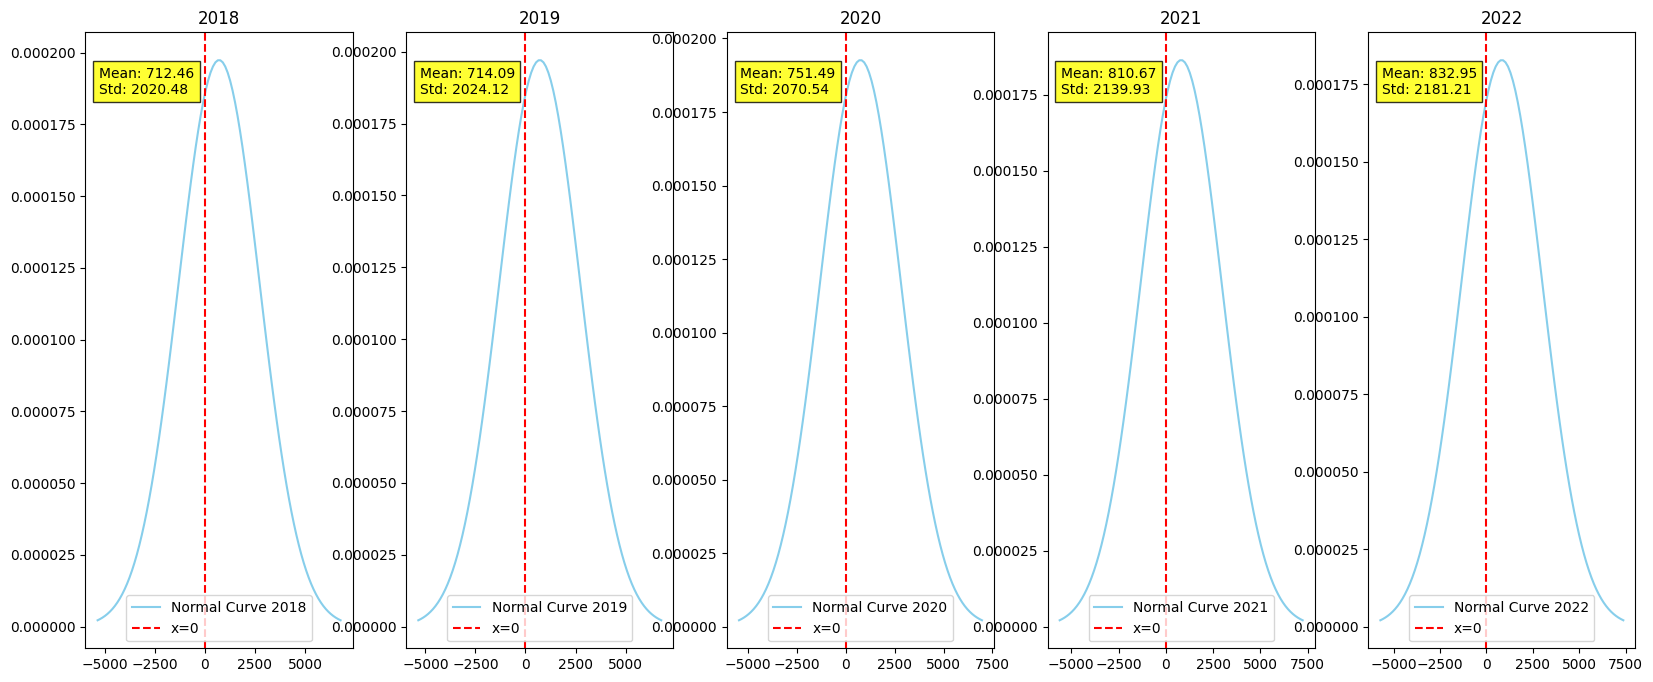

In [ ]:

fig, axs = plt.subplots(1, 5, figsize=(20 , 8))

axs = axs.flatten()

for i, column in enumerate(bc_location_stats.columns):
    ax = axs[i]
    mean = bc_location_stats.loc['Mean', column]
    std = bc_location_stats.loc['Std', column]

    x = np.linspace(mean - 3 * std, mean + 3 * std, 100)
    y = norm.pdf(x, mean, std)

    ax.plot(x, y, label=f'Normal Curve {column}',color='skyblue')
    ax.axvline(x=0, color='r', linestyle='--', label='x=0')

    ax.set_title(column)
    ax.legend()

    ax.legend()

    ax.text(0.05, 0.9, f'Mean: {mean:.2f}\nStd: {std:.2f}', transform=ax.transAxes, bbox=dict(facecolor='yellow', alpha=0.8))

plt.show()


In [ ]:

causes_of_death_bc = causes_of_death[causes_of_death['LOCATION'] == 'BC']
causes_of_death_bc.head()

,LOCATION,DEATH_CAUSE,CHARACTERISTICS,2018,2019,2020,2021,2022
220,BC,Salmonella infections,nr_deaths,0.0,1.0,3.0,1.0,1.0
222,BC,Shigellosis and amoebiasis,nr_deaths,0.0,0.0,0.0,0.0,0.0
224,BC,Certain other intestinal infections,nr_deaths,89.0,74.0,66.0,64.0,75.0
226,BC,Tuberculosis,nr_deaths,16.0,8.0,10.0,19.0,16.0
228,BC,Whooping cough,nr_deaths,0.0,0.0,0.0,0.0,0.0


In [ ]:

df_mortality_bc = df_mortality[df_mortality['LOCATION'] == 'BC']
df_mortality_bc.head()

,LOCATION,DEATH_CAUSE,CHARACTERISTICS,2018,2019,2020,2021,2022
221,BC,Salmonella infections,mort_rate_100K,0.0,0.0,0.0,0.0,0.0
223,BC,Shigellosis and amoebiasis,mort_rate_100K,0.0,0.0,0.0,0.0,0.0
225,BC,Certain other intestinal infections,mort_rate_100K,1.5,1.2,1.0,1.0,1.1
227,BC,Tuberculosis,mort_rate_100K,0.3,0.1,0.2,0.3,0.3
229,BC,Whooping cough,mort_rate_100K,0.0,0.0,0.0,0.0,0.0


In [ ]:
causes_of_death_bc_count = causes_of_death_bc['DEATH_CAUSE'].count()
causes_of_death_bc_count

55

<ipython-input-31-c463ef846baa>:16: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


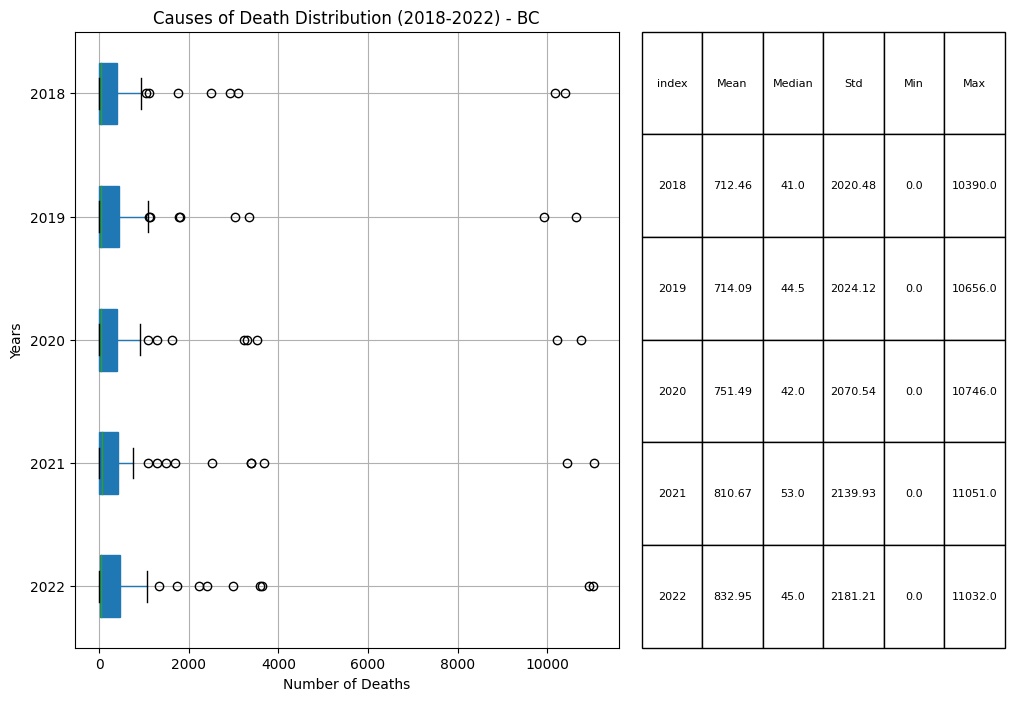

In [ ]:

years = ['2022', '2021', '2020', '2019', '2018']

fig, (ax_box, ax_table) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [15, 10], 'wspace': 0.05}, figsize=(12, 8))

causes_of_death_bc.boxplot(column=years, vert=False, patch_artist=True, ax=ax_box)

ax_box.set_xlabel('Number of Deaths')
ax_box.set_ylabel('Years')
ax_box.set_title('Causes of Death Distribution (2018-2022) - BC')

table_data = bc_location_stats.T.reset_index()
table = ax_table.table(cellText=table_data.values, colLabels=table_data.columns, loc='center', cellLoc='center', bbox=[0, 0, 1, 1], fontsize=20)

ax_table.axis('off')

plt.tight_layout()

plt.show()


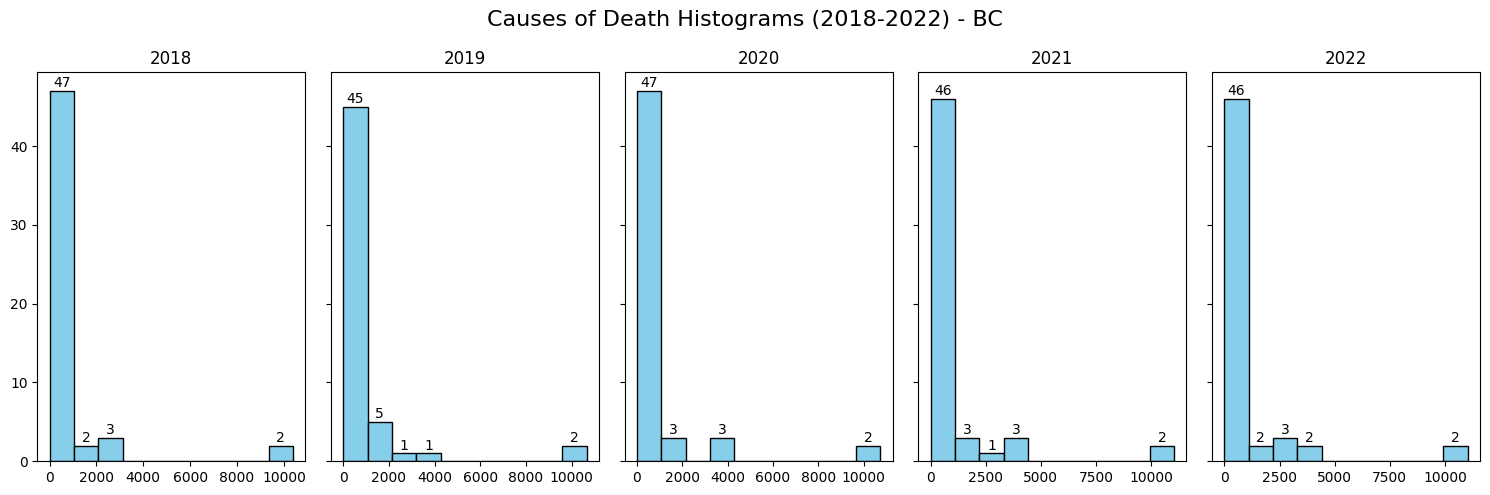

In [ ]:
selected_columns_bc = causes_of_death_bc[['2018', '2019', '2020', '2021', '2022']]

fig, axs = plt.subplots(1, 5, figsize=(15, 5), sharey=True, tight_layout=True)

for i, column in enumerate(selected_columns_bc.columns):
    counts, bins, patches = axs[i].hist(selected_columns_bc[column], bins=10, color='skyblue', edgecolor='black')
    axs[i].set_title(column)


    for count, bin_value, patch in zip(counts, bins, patches):
        if count > 0:
            axs[i].text(patch.get_x() + patch.get_width() / 2, patch.get_height() + 0.05,
                        f'{int(count)}', ha='center', va='bottom')

plt.suptitle('Causes of Death Histograms (2018-2022) - BC', fontsize=16)

plt.show()


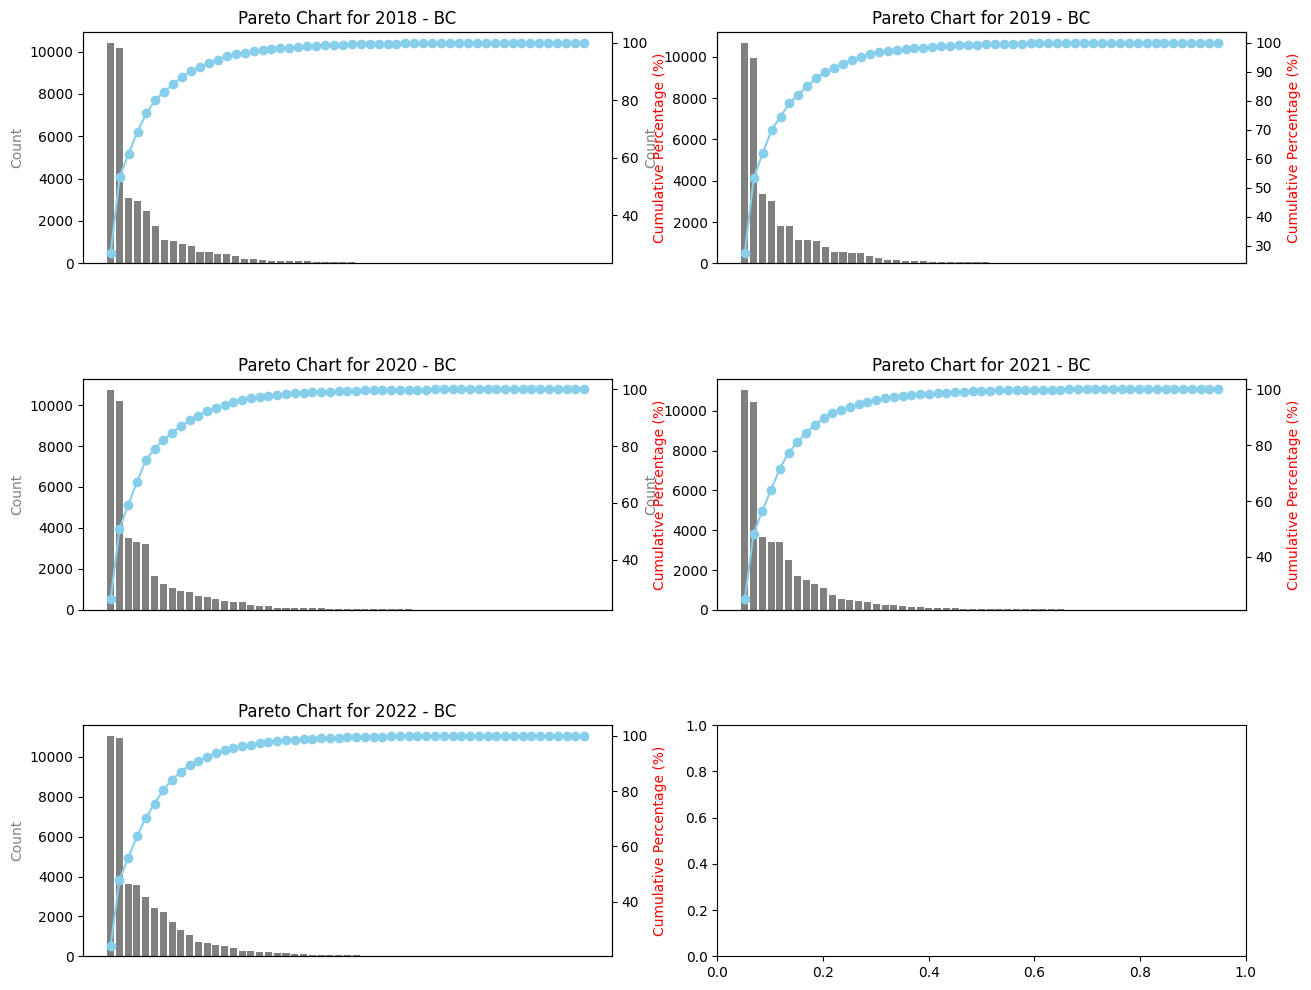

In [ ]:
causes_of_death_bc.set_index('DEATH_CAUSE', inplace=True)

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 12))
fig.subplots_adjust(hspace=0.5)


for i, year in enumerate(['2018', '2019', '2020', '2021', '2022']):
    sorted_data_bc = causes_of_death_bc.sort_values(by=year, ascending=False)
    cumulative_percentage = sorted_data_bc[year].cumsum() / sorted_data_bc[year].sum() * 100

    ax1 = axes[i // 2, i % 2]

    ax1.bar(sorted_data_bc.index, sorted_data_bc[year], color='grey')

    ax2 = ax1.twinx()
    ax2.plot(sorted_data_bc.index, cumulative_percentage, color='skyblue', marker='o')

    ax1.set_xticks([])
    ax1.set_xticklabels([])

    ax1.set_ylabel('Count', color='grey')
    ax2.set_ylabel('Cumulative Percentage (%)', color='red')
    ax1.set_title(f'Pareto Chart for {year} - BC')


plt.show()

In [ ]:
sorted_data_bc.head()

,LOCATION,CHARACTERISTICS,2018,2019,2020,2021,2022
DEATH_CAUSE,,,,,,,
Malignant neoplasms,BC,nr_deaths,10390.0,10656.0,10746.0,11051.0,11032.0
Major cardiovascular diseases,BC,nr_deaths,10166.0,9936.0,10222.0,10434.0,10940.0
Dementia,BC,nr_deaths,3097.0,3334.0,3301.0,3388.0,3625.0
All other diseases (residual) 26,BC,nr_deaths,2927.0,3028.0,3226.0,3382.0,3599.0
"Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified",BC,nr_deaths,832.0,1111.0,3529.0,3678.0,2979.0


##### NL - Newfoundland and Labrador

In [ ]:

nl_location_stats = pd.DataFrame({
    '2018': [causes_of_death.loc[causes_of_death['LOCATION'] == 'NL', '2018'].mean().round(2), causes_of_death.loc[causes_of_death['LOCATION'] == 'NL', '2018'].median().round(2), causes_of_death.loc[causes_of_death['LOCATION'] == 'NL', '2018'].std().round(2), causes_of_death.loc[causes_of_death['LOCATION'] == 'NL', '2018'].min().round(2),causes_of_death.loc[causes_of_death['LOCATION'] == 'NL', '2018'].max().round(2)],
    '2019': [causes_of_death.loc[causes_of_death['LOCATION'] == 'NL', '2019'].mean().round(2), causes_of_death.loc[causes_of_death['LOCATION'] == 'NL', '2019'].median().round(2), causes_of_death.loc[causes_of_death['LOCATION'] == 'NL', '2019'].std().round(2), causes_of_death.loc[causes_of_death['LOCATION'] == 'NL', '2019'].min().round(2),causes_of_death.loc[causes_of_death['LOCATION'] == 'NL', '2019'].max().round(2)],
    '2020': [causes_of_death.loc[causes_of_death['LOCATION'] == 'NL', '2020'].mean().round(2), causes_of_death.loc[causes_of_death['LOCATION'] == 'NL', '2020'].median().round(2), causes_of_death.loc[causes_of_death['LOCATION'] == 'NL', '2020'].std().round(2), causes_of_death.loc[causes_of_death['LOCATION'] == 'NL', '2020'].min().round(2),causes_of_death.loc[causes_of_death['LOCATION'] == 'NL', '2020'].max().round(2)],
    '2021': [causes_of_death.loc[causes_of_death['LOCATION'] == 'NL', '2021'].mean().round(2), causes_of_death.loc[causes_of_death['LOCATION'] == 'NL', '2021'].median().round(2), causes_of_death.loc[causes_of_death['LOCATION'] == 'NL', '2021'].std().round(2), causes_of_death.loc[causes_of_death['LOCATION'] == 'NL', '2021'].min().round(2),causes_of_death.loc[causes_of_death['LOCATION'] == 'NL', '2021'].max().round(2)],
    '2022': [causes_of_death.loc[causes_of_death['LOCATION'] == 'NL', '2022'].mean().round(2), causes_of_death.loc[causes_of_death['LOCATION'] == 'NL', '2022'].median().round(2), causes_of_death.loc[causes_of_death['LOCATION'] == 'NL', '2022'].std().round(2), causes_of_death.loc[causes_of_death['LOCATION'] == 'NL', '2022'].min().round(2),causes_of_death.loc[causes_of_death['LOCATION'] == 'NL', '2022'].max().round(2)]
}, index=['Mean', 'Median', 'Std', 'Min','Max'])


print(nl_location_stats)

           2018     2019     2020     2021     2022
Mean      97.00    97.54    98.96   106.64   116.47
Median     6.50     5.50     5.00     8.00     6.00
Std      282.48   281.63   293.04   311.06   297.97
Min        0.00     0.00     0.00     0.00     0.00
Max     1467.00  1500.00  1576.00  1698.00  1462.00


In [ ]:
nl_location_stats.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, Mean to Max
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2018    5 non-null      float64
 1   2019    5 non-null      float64
 2   2020    5 non-null      float64
 3   2021    5 non-null      float64
 4   2022    5 non-null      float64
dtypes: float64(5)
memory usage: 240.0+ bytes


In [ ]:
nl_location_stats

,2018,2019,2020,2021,2022
Mean,97.00,97.54,98.96,106.64,116.47
Median,6.50,5.50,5.00,8.00,6.00
Std,282.48,281.63,293.04,311.06,297.97
Min,0.00,0.00,0.00,0.00,0.00
Max,1467.00,1500.00,1576.00,1698.00,1462.00


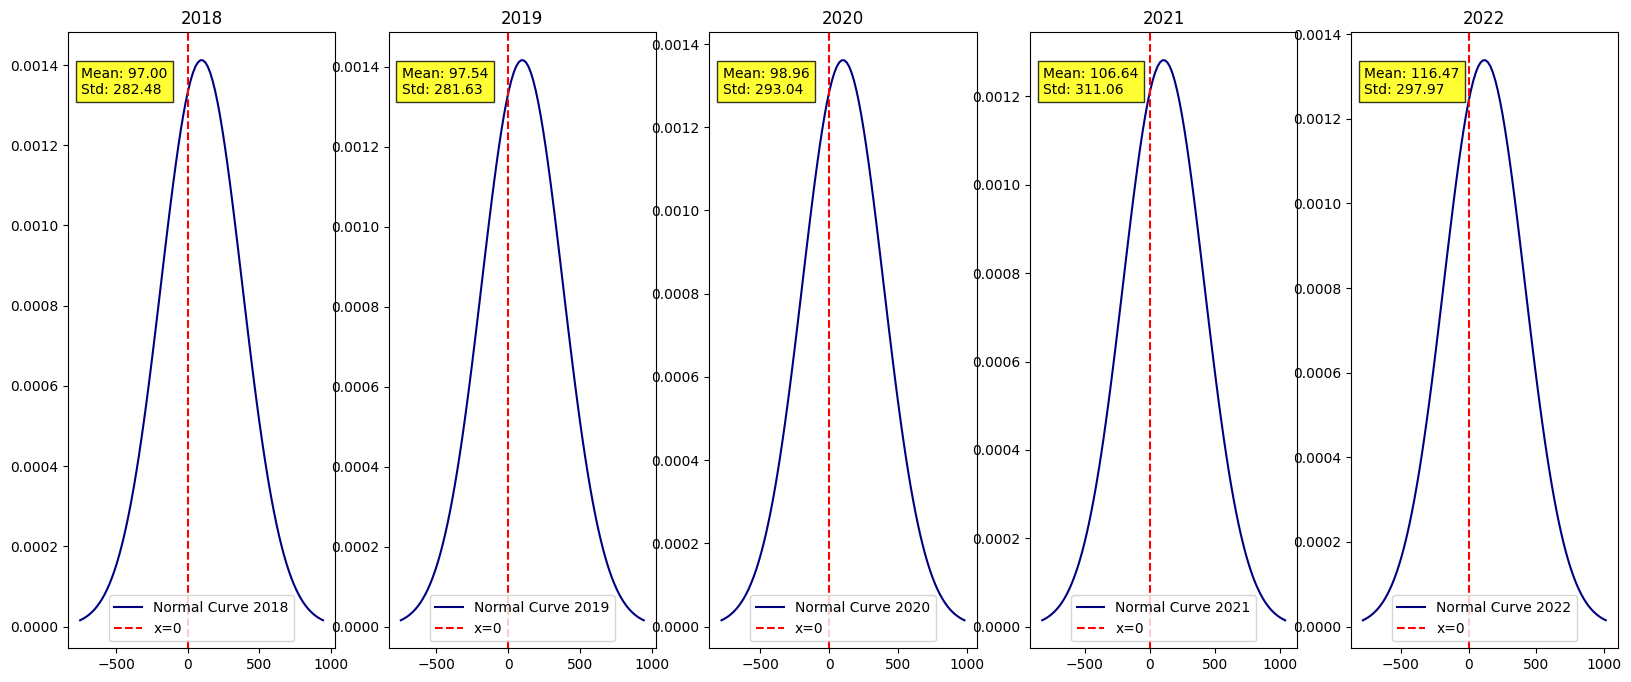

In [ ]:

fig, axs = plt.subplots(1, 5, figsize=(20 , 8))


axs = axs.flatten()


for i, column in enumerate(nl_location_stats.columns):
    ax = axs[i]
    mean = nl_location_stats.loc['Mean', column]
    std = nl_location_stats.loc['Std', column]


    x = np.linspace(mean - 3 * std, mean + 3 * std, 100)
    y = norm.pdf(x, mean, std)


    ax.plot(x, y, label=f'Normal Curve {column}',color='navy')
    ax.axvline(x=0, color='r', linestyle='--', label='x=0')


    ax.set_title(column)
    ax.legend()


    ax.legend()


    ax.text(0.05, 0.9, f'Mean: {mean:.2f}\nStd: {std:.2f}', transform=ax.transAxes, bbox=dict(facecolor='yellow', alpha=0.8))

plt.show()


In [ ]:

causes_of_death_nl = causes_of_death[causes_of_death['LOCATION'] == 'NL']
causes_of_death_nl.head()

,LOCATION,DEATH_CAUSE,CHARACTERISTICS,2018,2019,2020,2021,2022
110,NL,Salmonella infections,nr_deaths,0.0,0.0,0.0,1.0,0.0
112,NL,Shigellosis and amoebiasis,nr_deaths,0.0,0.0,0.0,0.0,0.0
114,NL,Certain other intestinal infections,nr_deaths,12.0,8.0,8.0,14.0,7.0
116,NL,Tuberculosis,nr_deaths,2.0,1.0,0.0,1.0,1.0
118,NL,Whooping cough,nr_deaths,0.0,0.0,0.0,0.0,0.0


In [ ]:

df_mortality_nl = df_mortality[df_mortality['LOCATION'] == 'NL']
df_mortality_nl.head()

,LOCATION,DEATH_CAUSE,CHARACTERISTICS,2018,2019,2020,2021,2022
111,NL,Salmonella infections,mort_rate_100K,0.0,0.0,0.0,0.2,0.0
113,NL,Shigellosis and amoebiasis,mort_rate_100K,0.0,0.0,0.0,0.0,0.0
115,NL,Certain other intestinal infections,mort_rate_100K,2.0,1.5,1.3,2.1,0.9
117,NL,Tuberculosis,mort_rate_100K,0.4,0.2,0.0,0.2,0.1
119,NL,Whooping cough,mort_rate_100K,0.0,0.0,0.0,0.0,0.0


In [ ]:
causes_of_death_nl_count = causes_of_death_nl['DEATH_CAUSE'].count()
causes_of_death_nl_count

55

<ipython-input-42-59a155fc3485>:20: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


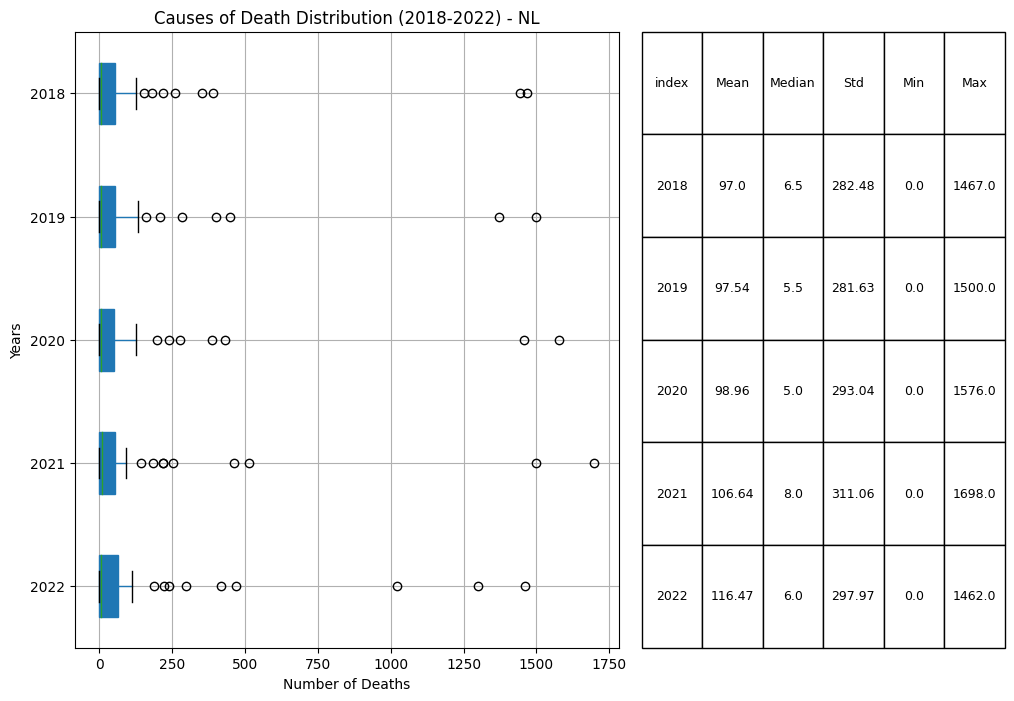

In [ ]:

years = ['2022', '2021', '2020', '2019', '2018']


fig, (ax_box, ax_table) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [15, 10], 'wspace': 0.05}, figsize=(12, 8))


causes_of_death_nl.boxplot(column=years, vert=False, patch_artist=True, ax=ax_box)


ax_box.set_xlabel('Number of Deaths')
ax_box.set_ylabel('Years')
ax_box.set_title('Causes of Death Distribution (2018-2022) - NL')


table_data = nl_location_stats.T.reset_index()
table = ax_table.table(cellText=table_data.values, colLabels=table_data.columns, loc='center', cellLoc='center', bbox=[0, 0, 1, 1], fontsize=20)

ax_table.axis('off')

plt.tight_layout()


plt.show()


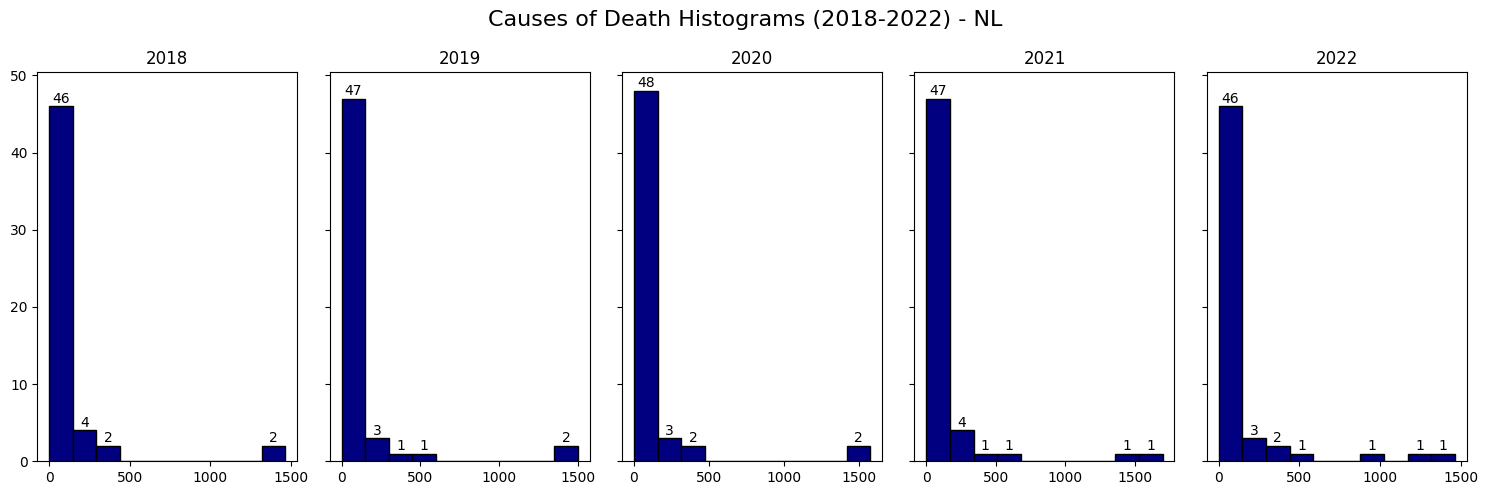

In [ ]:
selected_columns_nl = causes_of_death_nl[['2018', '2019', '2020', '2021', '2022']]

fig, axs = plt.subplots(1, 5, figsize=(15, 5), sharey=True, tight_layout=True)

for i, column in enumerate(selected_columns_nl.columns):
    counts, bins, patches = axs[i].hist(selected_columns_nl[column], bins=10, color='navy', edgecolor='black')
    axs[i].set_title(column)

    for count, bin_value, patch in zip(counts, bins, patches):
        if count > 0:
            axs[i].text(patch.get_x() + patch.get_width() / 2, patch.get_height() + 0.05,
                        f'{int(count)}', ha='center', va='bottom')

plt.suptitle('Causes of Death Histograms (2018-2022) - NL', fontsize=16)


plt.show()


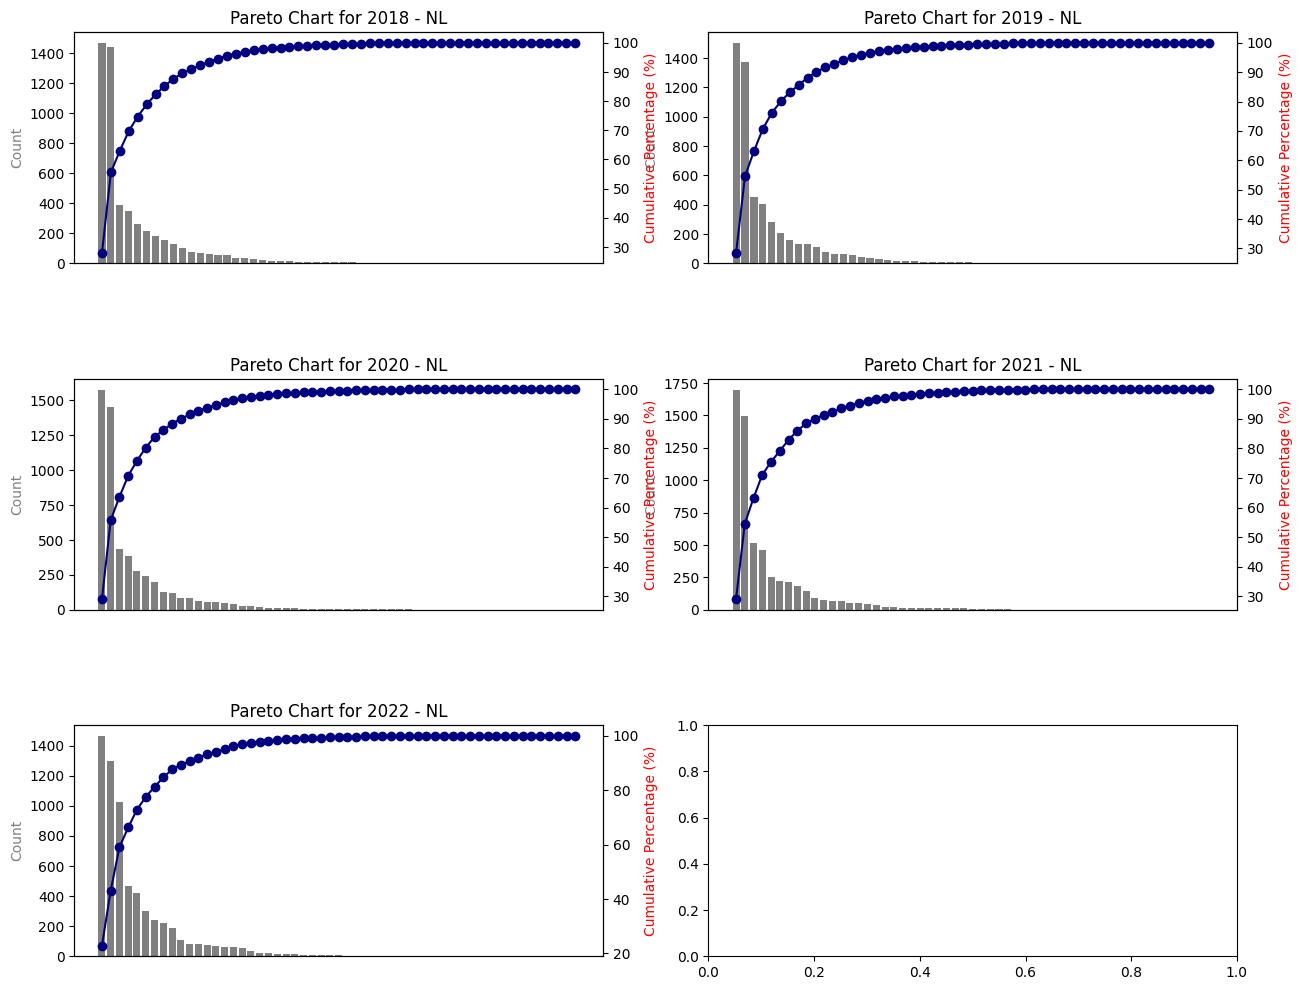

In [ ]:

causes_of_death_nl.set_index('DEATH_CAUSE', inplace=True)

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 12))
fig.subplots_adjust(hspace=0.5)


for i, year in enumerate(['2018', '2019', '2020', '2021', '2022']):
    sorted_data_nl = causes_of_death_nl.sort_values(by=year, ascending=False)
    cumulative_percentage = sorted_data_nl[year].cumsum() / sorted_data_nl[year].sum() * 100

    ax1 = axes[i // 2, i % 2]

    ax1.bar(sorted_data_nl.index, sorted_data_nl[year], color='grey')

    ax2 = ax1.twinx()
    ax2.plot(sorted_data_nl.index, cumulative_percentage, color='navy', marker='o')

    ax1.set_xticks([])
    ax1.set_xticklabels([])

    ax1.set_ylabel('Count', color='grey')
    ax2.set_ylabel('Cumulative Percentage (%)', color='red')
    ax1.set_title(f'Pareto Chart for {year} - NL')

plt.show()

In [ ]:
sorted_data_nl.head()

,LOCATION,CHARACTERISTICS,2018,2019,2020,2021,2022
DEATH_CAUSE,,,,,,,
Malignant neoplasms,NL,nr_deaths,1467.0,1500.0,1576.0,1698.0,1462.0
Major cardiovascular diseases,NL,nr_deaths,1445.0,1373.0,1456.0,1497.0,1298.0
"Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified",NL,nr_deaths,127.0,129.0,125.0,183.0,1022.0
All other diseases (residual) 26,NL,nr_deaths,389.0,401.0,432.0,515.0,468.0
Dementia,NL,nr_deaths,351.0,450.0,387.0,461.0,418.0


# **Statistical Conslusions, Defining Next Steps, and Exporting Results**

## All The plots for each province, as well as the plot for Canada, demonstrate a deviation from a normal distribution.



### **Normal Curve (bell curve)**
##### The lack of symmetry in the normal curves, with the peak shifted to the right, suggests a concentration of values at zero (indicating causes of death with a low occurrence in the population), another cluster in the low-to-moderate range, and a few extreme values on the right (indicating causes of death with a high occurrence in the population).

##### The lack of symmetry, while not immediately noticeable in the curve, becomes apparent when confirming that the peak of the bell does not align with zero on the x-axis.

### **Box Plot**

Across all three analyses, the proximity of the median to the minimum value indicates a positive skewness in the data. In a positively skewed distribution, the majority of data points cluster towards the lower end, with fewer extreme high values. In the context of this analysis, these extreme high values represent the more prevalent causes of death within the population.

### **Histogram and Pareto chart**

In both charts, we can infer that a small number of death causes have a significant impact on the overall causes of death regardless of the size of the province or country wise.

The bars more to the left indicates the causes of death that dominate each one of the distribuitions(high-frequency or high-impact factors).




### **Final Conclusion**
The visual analysis of the plots suggests that a limited number of categories or values exert a substantial impact, while the majority exhibit lower impact or occurrence.

It's crucial to note that employing an outlier removal approach, such as ZScore, could notably influence statistical measures like the mean and standard deviation. Such measures may deviate from representing the true characteristics of the distribution due to the inherent skewed nature of the data.

Recognizing that the skewed distribution may contain valid and meaningful observations, we opt to proceed with the analysis, focusing on the top 10 causes of death. This approach allows us to delve into the most influential factors while retaining a comprehensive understanding of the data's underlying characteristics.


### **CSV Export**

In [ ]:
causes_of_death.to_csv('deaths_final.csv', encoding='utf-8', index=False)